### Zindi: Sendy Logistics Challenge 
#### Regression Predict Submission
**Created by Nkosisithandile Mkhwanazi, 03 September 2020 <br>**


#### This notebook is structured as follows:
1. Import Sendy Logistics data - train and test dataset.
2. Data cleaning and preprosessing.
3. Exploratory Data Analysis.
4. Modelling the data.
5. Testing for best performing regression model.
6. Finalising best model and making the submission.

### 1. Import modules and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
riders_df = pd.read_csv('riders.csv')
variable_definitions_df = pd.read_csv('VariableDefinitions.csv')

In [3]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [5]:
variable_definitions_df

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


*** Note: Age is defined as the number of days since the rider delivered the first order. This is not to be confused with actual age in years of rider. ***

In [6]:
riders_df['Rider Id'].unique

<bound method Series.unique of 0      Rider_Id_396
1      Rider_Id_479
2      Rider_Id_648
3      Rider_Id_753
4      Rider_Id_335
           ...     
955    Rider_Id_896
956    Rider_Id_149
957    Rider_Id_270
958    Rider_Id_201
959    Rider_Id_904
Name: Rider Id, Length: 960, dtype: object>

In [7]:
print(train_df.shape, test_df.shape, riders_df.shape)

(21201, 29) (7068, 25) (960, 5)


**Note: I tried to include the riders information in the model but it ended up increasing the rmse.**

### 2. Data Cleaning and Preprocessing

In [8]:
#Check which columns are not in test_df

for col in train_df.columns:
    if col not in test_df.columns:
        print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [9]:
#Drop these columns which are not in test_df

train_copy_df = train_df.copy()
test_copy_df = test_df.copy() 


drop_list = ['Arrival at Destination - Day of Month', 
             'Arrival at Destination - Weekday (Mo = 1)', 
             'Arrival at Destination - Time']

train_copy_df = train_copy_df.drop(drop_list, axis=1)

train_copy_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [10]:
train_copy_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [11]:
#Check data types

train_copy_df.dtypes

Order No                                 object
User Id                                  object
Vehicle Type                             object
Platform Type                             int64
Personal or Business                     object
Placement - Day of Month                  int64
Placement - Weekday (Mo = 1)              int64
Placement - Time                         object
Confirmation - Day of Month               int64
Confirmation - Weekday (Mo = 1)           int64
Confirmation - Time                      object
Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Weekday (Mo = 1)      int64
Arrival at Pickup - Time                 object
Pickup - Day of Month                     int64
Pickup - Weekday (Mo = 1)                 int64
Pickup - Time                            object
Distance (KM)                             int64
Temperature                             float64
Precipitation in millimeters            float64
Pickup Lat                              

In [12]:
#Convert time from 12H to 24H format

def convert_to_24hrs(df):
    for col in df.columns:
        if col.endswith("Time"):
            df[col] = pd.to_datetime(df[col], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return df

In [13]:
convert_to_24hrs(train_copy_df)

train_copy_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,...,10:27:30,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,...,11:44:09,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,...,12:53:03,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,...,09:43:06,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,...,10:05:23,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [14]:
convert_to_24hrs(test_copy_df)

test_copy_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,16:44:10,27,3,...,3,17:06:47,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35,17,5,...,5,13:25:37,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14,27,4,...,4,11:57:54,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,13:51:35,17,1,...,1,14:16:52,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28,11,2,...,2,11:56:04,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [15]:
#Fill in missing values: Filled it with median of the column (Tried both mean and median).

train_copy_df['Temperature'] = train_copy_df['Temperature'].fillna(round(train_copy_df['Temperature'].median(),1))
train_copy_df['Precipitation in millimeters'].fillna(train_copy_df['Precipitation in millimeters'].median(), inplace=True)

test_copy_df['Temperature'] = test_copy_df['Temperature'].fillna(round(test_copy_df['Temperature'].median(),1))
test_copy_df['Precipitation in millimeters'].fillna(train_copy_df['Precipitation in millimeters'].median(), inplace=True)

**Note: In choosing the median on the above line, I tried both mean and median. The model performed better with the median as the chosen method of imputing missing values.**

In [16]:
train_copy_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,...,10:27:30,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,...,11:44:09,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,...,12:53:03,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,...,09:43:06,9,19.2,2.9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,...,10:05:23,9,15.4,2.9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,15:54:38,20,3,...,16:20:08,3,28.6,2.9,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34,13,6,...,10:33:27,7,26.0,2.9,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,17:06:16,7,4,...,17:50:52,20,29.2,2.9,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,09:31:39,4,3,...,09:45:15,13,15.0,2.9,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380


In [17]:
test_copy_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,16:44:10,27,3,...,3,17:06:47,8,23.4,2.9,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35,17,5,...,5,13:25:37,5,23.4,2.9,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14,27,4,...,4,11:57:54,5,22.8,2.9,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,13:51:35,17,1,...,1,14:16:52,5,24.5,2.9,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28,11,2,...,2,11:56:04,6,24.4,2.9,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49,7,1,...,1,10:48:18,5,24.8,2.9,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,14:59:42,10,3,...,3,15:21:44,22,30.7,2.9,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,14:45:12,5,3,...,3,15:07:52,10,25.1,2.9,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,15:18:26,29,2,...,2,15:46:35,18,23.6,2.9,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474


In [18]:
#Replace business or personal values with numeric values: Personal = 0, Business = 1
#Drop vehicle type because only bikes are used

train_copy_df['Personal or Business'] = train_copy_df['Personal or Business'].replace({'Personal':0, 'Business':1})
test_copy_df['Personal or Business'] = test_copy_df['Personal or Business'].replace({'Personal':0, 'Business':1})

train_copy_df = train_copy_df.drop('Vehicle Type', axis=1)
test_copy_df = test_copy_df.drop('Vehicle Type', axis=1)

train_copy_df.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,1,9,5,09:35:46,9,5,09:40:10,...,10:27:30,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,0,12,5,11:16:16,12,5,11:23:21,...,11:44:09,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,3,1,30,2,12:39:25,30,2,12:42:44,...,12:53:03,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,3,1,15,5,09:25:34,15,5,09:26:05,...,09:43:06,9,19.2,2.9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,1,0,13,1,09:55:18,13,1,09:56:18,...,10:05:23,9,15.4,2.9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [19]:
test_copy_df.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,3,1,27,3,16:44:10,27,3,16:44:29,...,3,17:06:47,8,23.4,2.9,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,3,1,17,5,12:57:35,17,5,12:59:17,...,5,13:25:37,5,23.4,2.9,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,3,1,27,4,11:08:14,27,4,11:25:05,...,4,11:57:54,5,22.8,2.9,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,3,1,17,1,13:51:35,17,1,13:53:27,...,1,14:16:52,5,24.5,2.9,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,3,1,11,2,11:30:28,11,2,11:34:45,...,2,11:56:04,6,24.4,2.9,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [20]:
#Check for columns with equal values

train_copy_df.loc[:, 'Placement - Day of Month':'Pickup - Time']

,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time
0,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30
1,12,5,11:16:16,12,5,11:23:21,12,5,11:40:22,12,5,11:44:09
2,30,2,12:39:25,30,2,12:42:44,30,2,12:49:34,30,2,12:53:03
3,15,5,09:25:34,15,5,09:26:05,15,5,09:37:56,15,5,09:43:06
4,13,1,09:55:18,13,1,09:56:18,13,1,10:03:53,13,1,10:05:23
...,...,...,...,...,...,...,...,...,...,...,...,...
21196,20,3,15:54:38,20,3,15:55:09,20,3,15:58:49,20,3,16:20:08
21197,13,6,10:13:34,13,6,10:13:41,13,6,10:20:04,13,6,10:33:27
21198,7,4,17:06:16,7,4,17:07:09,7,4,17:30:17,7,4,17:50:52
21199,4,3,09:31:39,4,3,09:31:53,4,3,09:38:59,4,3,09:45:15


In [21]:
#Compare equivalence of Placement, Confirmation, Arrival at Pickup and Pickup days of the month

comparison_1 = np.where(train_copy_df['Placement - Day of Month']==train_copy_df['Confirmation - Day of Month'], True, False)
print(comparison_1)

comparison_2 = np.where(train_copy_df['Confirmation - Day of Month']==train_copy_df['Arrival at Pickup - Day of Month'], True, False)
print(comparison_2)

comparison_3 = np.where(train_copy_df['Arrival at Pickup - Day of Month']==train_copy_df['Pickup - Day of Month'], True, False)
print(comparison_3)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


In [22]:
#Compare equivalence of Placement, Confirmation, Arrival at Pickup and Pickup weekdays

comparison_A = np.where(train_copy_df['Placement - Weekday (Mo = 1)']==train_copy_df['Confirmation - Weekday (Mo = 1)'], True, False)
print(comparison_A)

comparison_B = np.where(train_copy_df['Confirmation - Weekday (Mo = 1)']==train_copy_df['Arrival at Pickup - Weekday (Mo = 1)'], True, False)
print(comparison_B)

comparison_C = np.where(train_copy_df['Arrival at Pickup - Weekday (Mo = 1)']==train_copy_df['Pickup - Weekday (Mo = 1)'], True, False)
print(comparison_C)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


In [23]:
#Since the above-mentioned columns appear to be equivalent, we drop one of each from both train and test dataframes; We leave Pickups

removal_list = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)']

train_copy_df = train_copy_df.drop(removal_list, axis=1)
test_copy_df = test_copy_df.drop(removal_list, axis=1)

train_copy_df.head(3)

,Order No,User Id,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,3,1,09:35:46,09:40:10,10:04:47,9,5,10:27:30,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,0,11:16:16,11:23:21,11:40:22,12,5,11:44:09,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,3,1,12:39:25,12:42:44,12:49:34,30,2,12:53:03,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


### 3. Exploratory Data Analysis

In [24]:
#Summary statistics

train_copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Personal or Business,21201.0,0.819961,0.384229,0.000000,1.000000,1.000000,1.000000,1.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Distance (KM),21201.0,9.506533,5.668963,1.000000,5.000000,8.000000,13.000000,49.000000
Temperature,21201.0,23.308542,3.223481,11.200000,21.400000,23.500000,25.300000,32.100000
Precipitation in millimeters,21201.0,3.030333,2.868180,0.100000,2.900000,2.900000,2.900000,99.100000
Pickup Lat,21201.0,-1.281470,0.030507,-1.438302,-1.300921,-1.279395,-1.257147,-1.147170
Pickup Long,21201.0,36.811264,0.037473,36.653621,36.784605,36.807040,36.829741,36.991046
Destination Lat,21201.0,-1.282581,0.034824,-1.430298,-1.301201,-1.284382,-1.261177,-1.030225


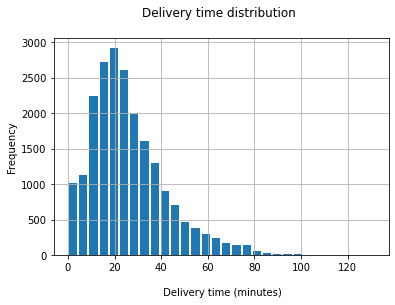

In [25]:
#Distribution of response variable

delivery_mins = train_copy_df['Time from Pickup to Arrival'] / 60
delivery_mins.hist(bins=30, rwidth=0.8)
plt.title("Delivery time distribution \n")
plt.xlabel("\n Delivery time (minutes)")
plt.ylabel("Frequency")

plt.show()

In [26]:
#Create correlation heatmap

correlation = train_copy_df.corr(method='pearson')
columns = correlation.nlargest(12, 'Time from Pickup to Arrival').index
columns

Index(['Time from Pickup to Arrival', 'Distance (KM)', 'Destination Long',
       'Pickup Long', 'Pickup - Weekday (Mo = 1)', 'Temperature',
       'Precipitation in millimeters', 'Platform Type', 'Personal or Business',
       'Pickup - Day of Month', 'Pickup Lat', 'Destination Lat'],
      dtype='object')

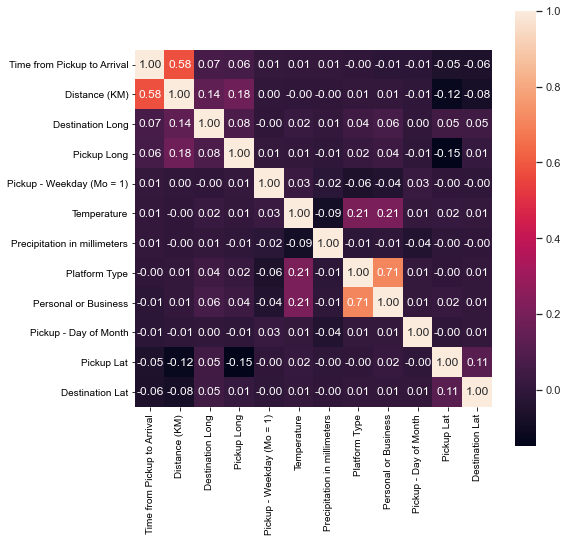

In [27]:
#Check correlation of variables

correlation_map = np.corrcoef(train_copy_df[columns].values.T)

fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

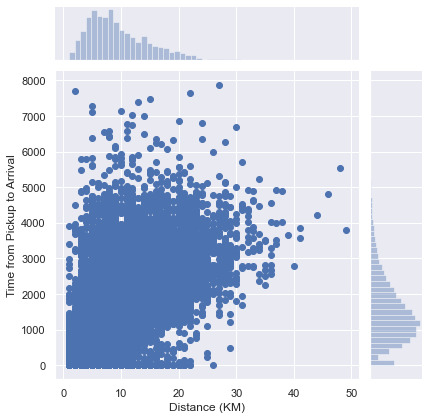

In [29]:
#Since there is a significant correlation between our response variable and distance, we can visualise the relationship

j_plot = sns.jointplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=train_copy_df)

### 4. Modelling the data

In [32]:
def extract_value_types(df):
    numeric_cols = []
    object_cols = []
    time_cols = []
    for k, v in df.dtypes.items():
        if (v != object):
            numeric_cols.append(k)
        elif k.endswith("Time"):
            time_cols.append(k)
        else:
            object_cols.append(k)
    return df[numeric_cols]

In [33]:
final_train_df = extract_value_types(train_copy_df)

final_train_df.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,1,9,5,4,20.4,2.9,-1.317755,36.830370,-1.300406,36.829741,745
1,3,0,12,5,16,26.4,2.9,-1.351453,36.899315,-1.295004,36.814358,1993
2,3,1,30,2,3,23.5,2.9,-1.308284,36.843419,-1.300921,36.828195,455
3,3,1,15,5,9,19.2,2.9,-1.281301,36.832396,-1.257147,36.795063,1341
4,1,0,13,1,9,15.4,2.9,-1.266597,36.792118,-1.295041,36.809817,1214


In [34]:
final_test_df = extract_value_types(test_copy_df)

final_test_df.head()

,Platform Type,Personal or Business,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,3,1,27,3,8,23.4,2.9,-1.333275,36.870815,-1.305249,36.822390
1,3,1,17,5,5,23.4,2.9,-1.272639,36.794723,-1.277007,36.823907
2,3,1,27,4,5,22.8,2.9,-1.290894,36.822971,-1.276574,36.851365
3,3,1,17,1,5,24.5,2.9,-1.290503,36.809646,-1.303382,36.790658
4,3,1,11,2,6,24.4,2.9,-1.281081,36.814423,-1.266467,36.792161


In [35]:
#Define predictor and response variables

drop_list = ['Time from Pickup to Arrival']

X = final_train_df.drop(drop_list, axis=1)
y = final_train_df['Time from Pickup to Arrival']

In [36]:
# import train/test splitting function from sklearn and StandardScaler to normalise data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

### 5. Test for best performing regression models

In [37]:
#Import regression modules

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

In [38]:
#Cross Validation

pipelines = []
pipelines.append(('Scaled_LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('Scaled_DecisionTree', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('Scaled_RandomForest', Pipeline([('Scaler', StandardScaler()),('RT', RandomForestRegressor())])))
pipelines.append(('Scaled_KN', Pipeline([('Scaler', StandardScaler()),('KN', KNeighborsRegressor())])))
pipelines.append(('Scaled_GB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=10, shuffle=True)
    cv_results = np.sqrt(abs(cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')))
    results.append(cv_results)
    names.append(name)

cv_means = []
cv_stds = []
for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())
    
cv_res = pd.DataFrame({ 
    'Algorithm': names,
    'CrossValMeans': cv_means, 'CrossValErrors': cv_stds
                       })

cv_res = cv_res.sort_values('CrossValMeans', ascending=True)
print(cv_res)

             Algorithm  CrossValMeans  CrossValErrors
4            Scaled_GB     778.594188       21.888932
2  Scaled_RandomForest     798.600520       19.918155
0         Scaled_LASSO     801.807786       21.124714
3            Scaled_KN     854.553031       17.459524
1  Scaled_DecisionTree    1124.130437       21.120389


In [39]:
#Normalise the predictors

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

#Parameter tuning of GradientBoostingRegressor model (best performing model):

param_grid = {'n_estimators':[5,50,200,250]}
model = GradientBoostingRegressor(random_state=42)
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaled_X_train, y_train)

means = np.sqrt(abs(grid_result.cv_results_['mean_test_score']))
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

871.714077 with: {'n_estimators': 5}
784.420915 with: {'n_estimators': 50}
776.990754 with: {'n_estimators': 200}
777.364640 with: {'n_estimators': 250}
Best: -603714.632572 using {'n_estimators': 200}


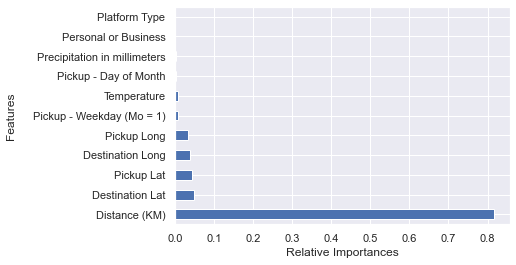

In [40]:
#Feature importance plot

model = GradientBoostingRegressor(n_estimators=200, random_state=21)
model.fit(X_train, y_train)
importances = model.feature_importances_

(pd.Series(importances, index=X.columns)
    .nlargest(11)
    .plot(kind='barh'))

plt.xlabel('Relative Importances')
plt.ylabel('Features \n')
plt.show()

**Note: From the plot above, it is clear that distance, destination latitude and pickup latitude are the greatest contributor to the model.**

### Create regression model

In [41]:
# transform the validation dataset

rescaled_X_test = scaler.transform(X_test)

In [42]:
#Initiate GradientBooster model

GB_model = GradientBoostingRegressor(random_state=42, n_estimators=200)
GB_model.fit(rescaled_X_train, y_train)

#Predict using GB_model and check accuracy of model
GB_train_pred = GB_model.predict(rescaled_X_train)
GB_test_pred = GB_model.predict(rescaled_X_test)

print('Train RMSE: ', mean_squared_error(y_train, GB_train_pred)**0.5)
print('Test RMSE: ', mean_squared_error(y_test, GB_test_pred)**0.5)

Train RMSE:  746.5807353897976
Test RMSE:  778.8934929723772


### 6. Final model submission

In [43]:
X_test_final = final_test_df
rescaled_X_test_final = scaler.transform(X_test_final)

GB_y = GB_model.predict(rescaled_X_test_final)
GB_output = pd.DataFrame({'Order No':test_df['Order No'], 'Time from Pickup to Arrival':GB_y})

GB_output.to_csv("submission.csv", index=False)

submission_df = pd.read_csv('submission.csv')

submission_df.head(10)

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1502.486580
1,Order_No_12736,1342.863944
2,Order_No_768,1281.902150
3,Order_No_15332,1265.443045
4,Order_No_21373,1256.853286
5,Order_No_14573,1959.383521
6,Order_No_6731,2496.399521
7,Order_No_18436,1603.179316
8,Order_No_2288,1512.098890
9,Order_No_9063,2200.277327
